In [129]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [130]:
df = pd.read_json("./data/val_sceneGraphs.json")

In [131]:
df = df.T

## 사진 한장에 Object 가 N개이고, N개의 object는 m개의 relation이 있음.

In [132]:
df.head(2)

,width,objects,height,location,weather
2353884,500,"{'2716708': {'name': 'nose', 'h': 9, 'relation...",281,NaN,NaN
2320168,331,"{'2811338': {'name': 'girl', 'h': 174, 'relati...",500,NaN,NaN


In [133]:
len(df)

10696

In [134]:
df.keys()

Index(['width', 'objects', 'height', 'location', 'weather'], dtype='object')

<Axes: >

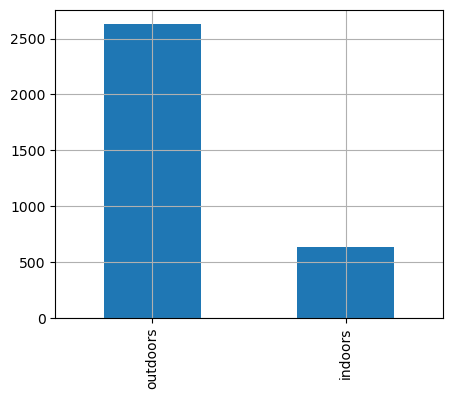

In [135]:
df["location"].value_counts().plot.bar(grid=True, figsize=(5,4), fontsize=10)

<Axes: >

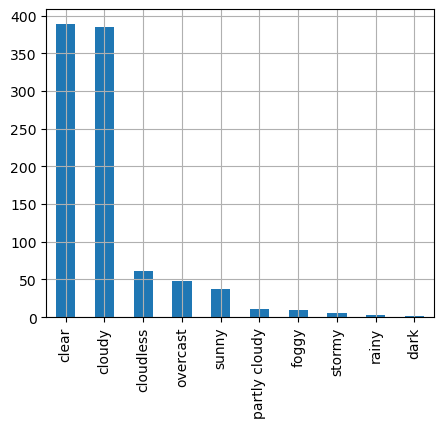

In [136]:
df["weather"].value_counts().plot.bar(grid=True, figsize=(5,4), fontsize=10)

In [137]:
sample_idx = 3
df.iloc[sample_idx]

width                                                     500
objects     {'722601': {'name': 'banana', 'h': 235, 'relat...
height                                                    400
location                                                  NaN
weather                                                   NaN
Name: 2375361, dtype: object

In [138]:
df_obj = pd.DataFrame(df["objects"].iloc[sample_idx])
df_obj = df_obj.T
df_obj

,name,h,relations,w,attributes,y,x
722601,banana,235,"[{'object': '722604', 'name': 'on'}]",201,[unpeeled],48,149
722606,table,398,"[{'object': '722604', 'name': 'under'}, {'obje...",499,[black],0,0
722599,banana,268,"[{'object': '722604', 'name': 'on'}, {'object'...",154,"[unpeeled, attached]",33,91
722604,plate,222,"[{'object': '722601', 'name': 'with'}, {'objec...",320,"[light colored, white, square]",113,37


In [ ]:
for rel_idx in range(len(df_obj)): #search on the number of REL from an OBJ, OBJ한개에 M개의 REL
    print(df_obj["relations"].iloc[rel_idx])
    for rel in df_obj["relations"].iloc[rel_idx]:
        print(rel["name"])

In [140]:
df_relsss = pd.DataFrame([{'object': '722604', 'name': 'on'}, {'object': '722606', 'name': 'on'}])

In [141]:
df_objects = pd.DataFrame()
df_rels = pd.DataFrame()
for obj_idx in tqdm(range(len(df["objects"]))): #search on the number of OBJ, 사진한장에 N개의 OBJ
    df_obj = pd.DataFrame(df["objects"].iloc[obj_idx]) # 한개의 OBJ 추출
    df_obj = df_obj.T
    for rel_idx in range(len(df_obj)): #search on the number of REL from an OBJ, OBJ한개에 M개의 REL
        rel_list = df_obj["relations"].iloc[rel_idx]
        df_rels = pd.concat([df_rels,pd.DataFrame(rel_list)], axis=0)
    df_objects = pd.concat([df_objects,df_obj], axis=0)

#    if obj_idx == 100:
#        break

In [142]:
df_objects

,name,h,relations,w,attributes,y,x
2716708,nose,9,"[{'object': '2449847', 'name': 'of'}, {'object...",7,[],54,370
2370325,eyes,4,"[{'object': '2493560', 'name': 'to the right o...",6,[],53,379
2747168,sign,52,"[{'object': '2449847', 'name': 'to the right o...",96,[blue],124,371
3576182,air,194,[],492,[],1,2
3100523,ear,12,"[{'object': '2449847', 'name': 'of'}, {'object...",11,[],63,389
...,...,...,...,...,...,...,...
1355480,child,78,"[{'object': '1355482', 'name': 'to the left of...",90,[small],163,158
1355483,lid,50,"[{'object': '1355482', 'name': 'to the left of...",188,[down],220,32
1355482,curtain,332,"[{'object': '1355487', 'name': 'to the right o...",207,"[floral, flowered, open]",0,292
1355489,head,45,[],47,[],97,97


In [143]:
df_rels

,object,name
0,2449847,of
1,2493560,to the right of
2,2370325,to the left of
0,2493560,to the right of
1,2716708,to the right of
...,...,...
2,1355480,to the right of
3,1355478,to the right of
4,1355483,to the right of
5,1355479,to the right of


In [144]:
df_objects["attributes_str"] = df_objects["attributes"].apply(lambda x: ','.join(x))

In [145]:
df_objects["attributes_str_del"] = df_objects["attributes_str"].apply(lambda x: '' if "," in x else x)

In [146]:
df_objects

,name,h,relations,w,attributes,y,x,attributes_str,attributes_str_del
2716708,nose,9,"[{'object': '2449847', 'name': 'of'}, {'object...",7,[],54,370,,
2370325,eyes,4,"[{'object': '2493560', 'name': 'to the right o...",6,[],53,379,,
2747168,sign,52,"[{'object': '2449847', 'name': 'to the right o...",96,[blue],124,371,blue,blue
3576182,air,194,[],492,[],1,2,,
3100523,ear,12,"[{'object': '2449847', 'name': 'of'}, {'object...",11,[],63,389,,
...,...,...,...,...,...,...,...,...,...
1355480,child,78,"[{'object': '1355482', 'name': 'to the left of...",90,[small],163,158,small,small
1355483,lid,50,"[{'object': '1355482', 'name': 'to the left of...",188,[down],220,32,down,down
1355482,curtain,332,"[{'object': '1355487', 'name': 'to the right o...",207,"[floral, flowered, open]",0,292,"floral,flowered,open",
1355489,head,45,[],47,[],97,97,,


In [147]:
df_objects["name"].value_counts()

window       4845
man          4426
shirt        3555
tree         3384
wall         3145
             ... 
popcorn         1
dolls           1
asparagus       1
kiwi            1
salon           1
Name: name, Length: 1536, dtype: int64

<Axes: >

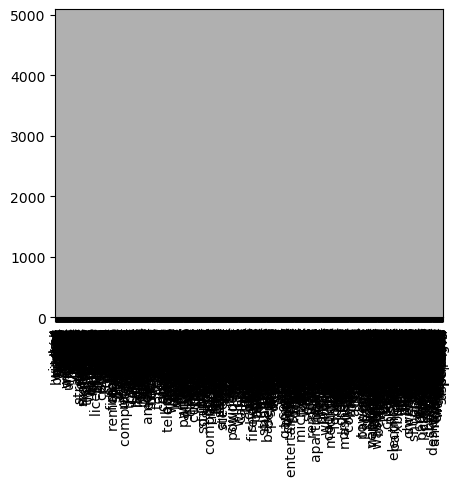

In [148]:
df_objects["name"].value_counts().plot.bar(grid=True, figsize=(5,4), fontsize=10)

In [149]:
df_objects["attributes_str_del"].value_counts()

              113532
white          10477
black           7050
blue            4843
green           4814
               ...  
fine               1
gloomy             1
commercial         1
grated             1
uneven             1
Name: attributes_str_del, Length: 568, dtype: int64

In [150]:
df_rels["name"].value_counts()

to the left of     238419
to the right of    238419
on                  12711
wearing              7622
of                   4877
                    ...  
coming down             1
adjusting               1
photographing           1
towing                  1
moving                  1
Name: name, Length: 295, dtype: int64